<a href="https://colab.research.google.com/github/um1tberke/FairCardsInTurkishSuperLeague-DSA210Project/blob/main/FairCardsInTurkishSuperLeague.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", None)
pd.set_option("display.width", 120)

In [ ]:
bjk = pd.read_csv("bjk23_24.csv")
fb  = pd.read_csv("fb23_24.csv")
gs  = pd.read_csv("gs23_24.csv")

print("BJK shape:", bjk.shape)
print("FB  shape:", fb.shape)
print("GS  shape:", gs.shape)

bjk.head()

BJK shape: (38, 13)
FB  shape: (40, 13)
GS  shape: (41, 13)


,season,week,home_away,opponent,home_odds,draw_odds,away_odds,team_yellow,team_red,opp_yellow,opp_red,team_fouls,opp_fouls
0,2023-24,1,A,FATIH KARAGUMRUK,4.74,3.60,1.40,1,0,4,0,13,14
1,2023-24,2,H,PENDIKSPOR,1.13,5.24,8.05,4,0,4,0,11,9
2,2023-24,3,H,SIVASSPOR,1.21,4.48,6.49,2,0,4,0,17,17
3,2023-24,4,A,TRABZONSPOR,2.71,3.13,1.95,1,0,4,0,11,15
4,2023-24,5,H,KAYSERISPOR,1.20,4.50,6.66,1,0,0,0,13,9


In [ ]:
def clean_team_df(df, team_name):
    df = df[df["week"].notna() & df["season"].notna()].copy()
    df["week"] = df["week"].astype(int)
    df["team"] = team_name
    return df

bjk = clean_team_df(bjk, "BESIKTAS")
fb  = clean_team_df(fb,  "FENERBAHCE")
gs  = clean_team_df(gs,  "GALATASARAY")

print(bjk.shape, fb.shape, gs.shape)
bjk.head()

(38, 14) (38, 14) (38, 14)


,season,week,home_away,opponent,home_odds,draw_odds,away_odds,team_yellow,team_red,opp_yellow,opp_red,team_fouls,opp_fouls,team
0,2023-24,1,A,FATIH KARAGUMRUK,4.74,3.60,1.40,1,0,4,0,13,14,BESIKTAS
1,2023-24,2,H,PENDIKSPOR,1.13,5.24,8.05,4,0,4,0,11,9,BESIKTAS
2,2023-24,3,H,SIVASSPOR,1.21,4.48,6.49,2,0,4,0,17,17,BESIKTAS
3,2023-24,4,A,TRABZONSPOR,2.71,3.13,1.95,1,0,4,0,11,15,BESIKTAS
4,2023-24,5,H,KAYSERISPOR,1.20,4.50,6.66,1,0,0,0,13,9,BESIKTAS


In [ ]:
all_big = pd.concat([bjk, fb, gs], ignore_index=True)
all_big.shape, all_big.head()

((114, 14),
     season  week home_away          opponent  home_odds  draw_odds  away_odds  team_yellow  team_red  opp_yellow  \
 0  2023-24     1         A  FATIH KARAGUMRUK       4.74       3.60       1.40          1.0       0.0         4.0   
 1  2023-24     2         H        PENDIKSPOR       1.13       5.24       8.05          4.0       0.0         4.0   
 2  2023-24     3         H         SIVASSPOR       1.21       4.48       6.49          2.0       0.0         4.0   
 3  2023-24     4         A       TRABZONSPOR       2.71       3.13       1.95          1.0       0.0         4.0   
 4  2023-24     5         H       KAYSERISPOR       1.20       4.50       6.66          1.0       0.0         0.0   
 
    opp_red  team_fouls  opp_fouls      team  
 0      0.0        13.0       14.0  BESIKTAS  
 1      0.0        11.0        9.0  BESIKTAS  
 2      0.0        17.0       17.0  BESIKTAS  
 3      0.0        11.0       15.0  BESIKTAS  
 4      0.0        13.0        9.0  BESIKTAS  )

In [ ]:
num_cols = ["team_yellow", "opp_yellow",
            "team_red", "opp_red",
            "team_fouls", "opp_fouls",
            "home_odds", "draw_odds", "away_odds"]

all_big[num_cols].describe().round(2)

,team_yellow,opp_yellow,team_red,opp_red,team_fouls,opp_fouls,home_odds,draw_odds,away_odds
count,114.00,114.00,114.00,114.00,114.00,114.00,114.00,114.00,114.00
mean,2.25,2.68,0.04,0.04,13.67,13.29,2.88,4.42,4.50
std,1.57,1.74,0.18,0.21,4.15,4.22,2.11,1.61,3.79
min,0.00,0.00,0.00,0.00,5.00,6.00,1.00,2.15,1.00
25%,1.00,1.00,0.00,0.00,11.00,10.00,1.18,3.32,1.54
50%,2.00,3.00,0.00,0.00,13.00,13.00,2.02,4.03,2.46
75%,3.00,4.00,0.00,0.00,17.00,16.00,3.96,5.22,7.14
max,7.00,9.00,1.00,1.00,26.00,29.00,11.85,15.90,17.80


In [ ]:
#big club differences
all_big["diff_yellow"] = all_big["team_yellow"] - all_big["opp_yellow"]
all_big["diff_red"]    = all_big["team_red"]    - all_big["opp_red"]
all_big["diff_fouls"]  = all_big["team_fouls"]  - all_big["opp_fouls"]

all_big[["team", "week", "home_away", "opponent",
         "team_yellow", "opp_yellow", "diff_yellow",
         "team_red", "opp_red", "diff_red",
         "team_fouls", "opp_fouls", "diff_fouls"]].head(10)

,team,week,home_away,opponent,team_yellow,opp_yellow,diff_yellow,team_red,opp_red,diff_red,team_fouls,opp_fouls,diff_fouls
0,BESIKTAS,1,A,FATIH KARAGUMRUK,1.0,4.0,-3.0,0.0,0.0,0.0,13.0,14.0,-1.0
1,BESIKTAS,2,H,PENDIKSPOR,4.0,4.0,0.0,0.0,0.0,0.0,11.0,9.0,2.0
2,BESIKTAS,3,H,SIVASSPOR,2.0,4.0,-2.0,0.0,0.0,0.0,17.0,17.0,0.0
3,BESIKTAS,4,A,TRABZONSPOR,1.0,4.0,-3.0,0.0,0.0,0.0,11.0,15.0,-4.0
4,BESIKTAS,5,H,KAYSERISPOR,1.0,0.0,1.0,0.0,0.0,0.0,13.0,9.0,4.0
5,BESIKTAS,6,A,ADANA DEMIRSPOR,1.0,2.0,-1.0,0.0,0.0,0.0,15.0,16.0,-1.0
6,BESIKTAS,7,A,KONYASPOR,3.0,2.0,1.0,0.0,0.0,0.0,20.0,13.0,7.0
7,BESIKTAS,8,H,ISTANBULSPOR,2.0,2.0,0.0,0.0,0.0,0.0,11.0,10.0,1.0
8,BESIKTAS,9,A,GALATASARAY,6.0,3.0,3.0,1.0,0.0,1.0,18.0,12.0,6.0
9,BESIKTAS,10,H,GAZIANTEP FK,2.0,5.0,-3.0,0.0,0.0,0.0,15.0,16.0,-1.0


In [ ]:
all_big[["diff_yellow", "diff_red", "diff_fouls"]].mean().round(3)


,0
diff_yellow,-0.430
diff_red,-0.009
diff_fouls,0.377


Across all 114 matches, the mean difference is about -0.43, meaning big clubs receive roughly 0.4 fewer yellow cards per match than their opponents on average. The mean difference in red cards is essentially zero, while big clubs commit slightly more fouls.

In [ ]:
# card point: yellow + 2 * red
all_big["team_card_points"] = all_big["team_yellow"] + 2 * all_big["team_red"]
all_big["opp_card_points"]  = all_big["opp_yellow"]  + 2 * all_big["opp_red"]

# difference: big club - opponent
all_big["diff_card_points"] = all_big["team_card_points"] - all_big["opp_card_points"]

all_big[["team", "week", "home_away", "opponent",
         "team_yellow", "team_red", "team_card_points",
         "opp_yellow", "opp_red", "opp_card_points",
         "diff_card_points"]].head(10)

,team,week,home_away,opponent,team_yellow,team_red,team_card_points,opp_yellow,opp_red,opp_card_points,diff_card_points
0,BESIKTAS,1,A,FATIH KARAGUMRUK,1.0,0.0,1.0,4.0,0.0,4.0,-3.0
1,BESIKTAS,2,H,PENDIKSPOR,4.0,0.0,4.0,4.0,0.0,4.0,0.0
2,BESIKTAS,3,H,SIVASSPOR,2.0,0.0,2.0,4.0,0.0,4.0,-2.0
3,BESIKTAS,4,A,TRABZONSPOR,1.0,0.0,1.0,4.0,0.0,4.0,-3.0
4,BESIKTAS,5,H,KAYSERISPOR,1.0,0.0,1.0,0.0,0.0,0.0,1.0
5,BESIKTAS,6,A,ADANA DEMIRSPOR,1.0,0.0,1.0,2.0,0.0,2.0,-1.0
6,BESIKTAS,7,A,KONYASPOR,3.0,0.0,3.0,2.0,0.0,2.0,1.0
7,BESIKTAS,8,H,ISTANBULSPOR,2.0,0.0,2.0,2.0,0.0,2.0,0.0
8,BESIKTAS,9,A,GALATASARAY,6.0,1.0,8.0,3.0,0.0,3.0,5.0
9,BESIKTAS,10,H,GAZIANTEP FK,2.0,0.0,2.0,5.0,0.0,5.0,-3.0


In [ ]:
all_big[["diff_yellow", "diff_red", "diff_card_points"]].mean().round(3)

,0
diff_yellow,-0.430
diff_red,-0.009
diff_card_points,-0.447


To account for the higher impact of red cards, I define a “card points” metric where yellow = 1 and red = 2. The mean difference in card points (big club - opponent) is about -0.45. Even under this definition, big clubs still receive fewer total disciplinary points than their opponents on average.

In [ ]:
per_team = (
    all_big
    .groupby("team")[["diff_yellow", "diff_red", "diff_card_points", "diff_fouls"]]
    .mean()
    .round(3)
)
per_team

,diff_yellow,diff_red,diff_card_points,diff_fouls
team,,,,
BESIKTAS,0.184,0.079,0.342,0.579
FENERBAHCE,-0.684,-0.026,-0.737,-1.105
GALATASARAY,-0.789,-0.079,-0.947,1.658


In [ ]:
# 1 / odds with raw probability
for side in ["home", "draw", "away"]:
    all_big[f"{side}_imp"] = 1 / all_big[f"{side}_odds"]

all_big["imp_sum"] = all_big[["home_imp", "draw_imp", "away_imp"]].sum(axis=1)

for side in ["home", "draw", "away"]:
    all_big[f"{side}_prob"] = all_big[f"{side}_imp"] / all_big["imp_sum"]

all_big[["home_odds", "draw_odds", "away_odds",
         "home_prob", "draw_prob", "away_prob"]].head()

,home_odds,draw_odds,away_odds,home_prob,draw_prob,away_prob
0,4.74,3.60,1.40,0.175365,0.230898,0.593737
1,1.13,5.24,8.05,0.737451,0.159031,0.103518
2,1.21,4.48,6.49,0.686563,0.185433,0.128003
3,2.71,3.13,1.95,0.307167,0.265950,0.426883
4,1.20,4.50,6.66,0.691158,0.184309,0.124533


In [ ]:
import numpy as np

all_big["big_win_prob"] = np.where(
    all_big["home_away"] == "H",
    all_big["home_prob"],
    all_big["away_prob"]
)

all_big["opp_win_prob"] = np.where(
    all_big["home_away"] == "H",
    all_big["away_prob"],
    all_big["home_prob"]
)

all_big["is_favourite"] = all_big["big_win_prob"] > all_big["opp_win_prob"]

all_big[["team", "home_away", "opponent",
         "home_odds", "away_odds",
         "big_win_prob", "opp_win_prob", "is_favourite"]].head(10)

,team,home_away,opponent,home_odds,away_odds,big_win_prob,opp_win_prob,is_favourite
0,BESIKTAS,A,FATIH KARAGUMRUK,4.74,1.40,0.593737,0.175365,True
1,BESIKTAS,H,PENDIKSPOR,1.13,8.05,0.737451,0.103518,True
2,BESIKTAS,H,SIVASSPOR,1.21,6.49,0.686563,0.128003,True
3,BESIKTAS,A,TRABZONSPOR,2.71,1.95,0.426883,0.307167,True
4,BESIKTAS,H,KAYSERISPOR,1.20,6.66,0.691158,0.124533,True
5,BESIKTAS,A,ADANA DEMIRSPOR,2.76,1.84,0.450945,0.300630,True
6,BESIKTAS,A,KONYASPOR,2.67,2.94,0.323168,0.355848,False
7,BESIKTAS,H,ISTANBULSPOR,2.87,1.86,0.292796,0.451787,False
8,BESIKTAS,A,GALATASARAY,1.47,4.05,0.205175,0.565278,False
9,BESIKTAS,H,GAZIANTEP FK,1.36,4.83,0.610652,0.171943,True


In [ ]:
all_big["is_favourite"].mean(), all_big["is_favourite"].sum()
all_big.groupby("is_favourite")[["diff_yellow", "diff_card_points"]].mean().round(3)

,diff_yellow,diff_card_points
is_favourite,,
False,1.250,1.750
True,-0.627,-0.706


In [ ]:
all_big.groupby(["team", "is_favourite"])[["diff_yellow", "diff_card_points"]].mean().round(3)

diff_yellow  diff_card_points
team        is_favourite                               
BESIKTAS    False               1.100             1.700
            True               -0.143            -0.143
FENERBAHCE  False               3.000             3.000
            True               -0.784            -0.838
GALATASARAY False               1.000             1.000
            True               -0.838            -1.000

In [ ]:
# foul card correlation("big clubs")
all_big[["team_fouls", "team_yellow"]].corr()

,team_fouls,team_yellow
team_fouls,1.000000,0.278498
team_yellow,0.278498,1.000000


To check how closely fouls translate into yellow cards, I computed the Pearson correlation between **'team_fouls'** and **'team_yellow'** for big-club teams. The correlation is about **0.28**, which is a **moderate positive** relationship. In other words, matches where big clubs commit more fouls tend to be the matches where they receive more yellow cards, but fouls do not mechanically turn into cards one-for-one.


In [ ]:
# foul card correlation(opp team)
all_big[["opp_fouls", "opp_yellow"]].corr()

,opp_fouls,opp_yellow
opp_fouls,1.000000,0.438613
opp_yellow,0.438613,1.000000


For opponents, the correlation between **'opp_fouls'** and **'opp_yellow'** is stronger, around **0.44**. This indicates a clearer positive link: when opponents commit more fouls, they are more likely to receive additional yellow cards compared to big clubs. This asymmetry is consistent with the idea that similar foul volumes can lead to different card outcomes for big clubs and their opponents.

In [ ]:
from scipy import stats

RQ1: Do “big-club” teams receive fewer yellow/red cards than their opponents in a systematic way?

In [ ]:
diff_y = all_big["diff_yellow"]

t_stat_y, p_two_y = stats.ttest_1samp(diff_y, 0.0)

# one-sided p-value (H1: mean < 0)
if t_stat_y < 0:
    p_one_y = p_two_y / 2
else:
    p_one_y = 1 - p_two_y / 2

t_stat_y, p_two_y, p_one_y, diff_y.mean()

(np.float64(-2.2552175474101785),
 np.float64(0.0260456178749116),
 np.float64(0.0130228089374558),
 np.float64(-0.4298245614035088))

H0: E[diff_yellow] = 0

H1: E[diff_yellow] < 0

In [ ]:
diff_cp = all_big["diff_card_points"]

t_stat_cp, p_two_cp = stats.ttest_1samp(diff_cp, 0.0)

if t_stat_cp < 0:
    p_one_cp = p_two_cp / 2
else:
    p_one_cp = 1 - p_two_cp / 2

t_stat_cp, p_two_cp, p_one_cp, diff_cp.mean()

(np.float64(-2.090081296742844),
 np.float64(0.03885370339448573),
 np.float64(0.019426851697242866),
 np.float64(-0.4473684210526316))

H0: E[diff_cp] = 0

H1: E[diff_cp] < 0

### Hypothesis test for the big-club effect (yellow cards)

I test whether big clubs receive fewer yellow cards than their opponents using the match level difference

{diff\_yellow} = {big-club yellows} - {opponent yellows}.



- H0: E[diff_yellow] = 0  (no systematic difference)
- H1: E[diff_yellow] < 0  (big clubs receive fewer yellow cards)


Across 114 matches, the sample mean of ***`diff_yellow`*** is about **-0.43**.  
A one-sample t-test gives **t ≈ -2.26** with a two-sided p-value of **0.026** (one-sided p ≈ **0.013**).  
At the 5% significance level, I reject the null hypothesis and find evidence that big clubs receive fewer yellow cards than their opponents.

### Robustness check with card points (yellow = 1, red = 2)

To incorporate the impact of red cards, I use ***`card_points = yellow + 2 × red`*** and define

{diff\_card\_points} = {big-club card points} - {opponent card points}.



The mean of ***`diff_card_points`*** is approximately **-0.45**.  
The corresponding t-test yields **t ≈ -2.09** with a two-sided p-value of **0.039** (one-sided p ≈ **0.019**).  
This robustness check confirms the main result: big clubs also receive fewer total disciplinary points than their opponents on average.

### RQ2 – Does playing at home create a meaningful advantage in card counts?


In [ ]:
# Build home/away statistics
home_yellow = []
away_yellow = []
home_card_points = []
away_card_points = []
home_fouls = []
away_fouls = []

for _, row in all_big.iterrows():
    if row["home_away"] == "H":
        # Big club is the home team in this match
        home_yellow.append(row["team_yellow"])
        away_yellow.append(row["opp_yellow"])
        home_card_points.append(row["team_card_points"])
        away_card_points.append(row["opp_card_points"])
        home_fouls.append(row["team_fouls"])
        away_fouls.append(row["opp_fouls"])
    else:
        # Big club is the away team in this match
        # So opponent is the home side
        home_yellow.append(row["opp_yellow"])
        away_yellow.append(row["team_yellow"])
        home_card_points.append(row["opp_card_points"])
        away_card_points.append(row["team_card_points"])
        home_fouls.append(row["opp_fouls"])
        away_fouls.append(row["team_fouls"])

# Add these new columns to the dataframe
all_big["home_yellow"] = home_yellow
all_big["away_yellow"] = away_yellow
all_big["home_card_points"] = home_card_points
all_big["away_card_points"] = away_card_points
all_big["home_fouls"] = home_fouls
all_big["away_fouls"] = away_fouls

# Quick check
all_big[["home_away", "team", "opponent",
         "home_yellow", "away_yellow",
         "home_card_points", "away_card_points"]].head(10)

,home_away,team,opponent,home_yellow,away_yellow,home_card_points,away_card_points
0,A,BESIKTAS,FATIH KARAGUMRUK,4.0,1.0,4.0,1.0
1,H,BESIKTAS,PENDIKSPOR,4.0,4.0,4.0,4.0
2,H,BESIKTAS,SIVASSPOR,2.0,4.0,2.0,4.0
3,A,BESIKTAS,TRABZONSPOR,4.0,1.0,4.0,1.0
4,H,BESIKTAS,KAYSERISPOR,1.0,0.0,1.0,0.0
5,A,BESIKTAS,ADANA DEMIRSPOR,2.0,1.0,2.0,1.0
6,A,BESIKTAS,KONYASPOR,2.0,3.0,2.0,3.0
7,H,BESIKTAS,ISTANBULSPOR,2.0,2.0,2.0,2.0
8,A,BESIKTAS,GALATASARAY,3.0,6.0,3.0,8.0
9,H,BESIKTAS,GAZIANTEP FK,2.0,5.0,2.0,5.0


In [ ]:
# Home - away differences in cards
all_big["diff_home_yellow"] = all_big["home_yellow"] - all_big["away_yellow"]
all_big["diff_home_card_points"] = all_big["home_card_points"] - all_big["away_card_points"]

# Quick look at the first rows
all_big[["home_yellow", "away_yellow", "diff_home_yellow",
         "home_card_points", "away_card_points", "diff_home_card_points"]].head(10)

,home_yellow,away_yellow,diff_home_yellow,home_card_points,away_card_points,diff_home_card_points
0,4.0,1.0,3.0,4.0,1.0,3.0
1,4.0,4.0,0.0,4.0,4.0,0.0
2,2.0,4.0,-2.0,2.0,4.0,-2.0
3,4.0,1.0,3.0,4.0,1.0,3.0
4,1.0,0.0,1.0,1.0,0.0,1.0
5,2.0,1.0,1.0,2.0,1.0,1.0
6,2.0,3.0,-1.0,2.0,3.0,-1.0
7,2.0,2.0,0.0,2.0,2.0,0.0
8,3.0,6.0,-3.0,3.0,8.0,-5.0
9,2.0,5.0,-3.0,2.0,5.0,-3.0


In [ ]:
# Mean home-away differences
all_big[["diff_home_yellow", "diff_home_card_points"]].mean().round(3)

,0
diff_home_yellow,-0.237
diff_home_card_points,-0.289


In [ ]:
from scipy import stats

# Hypothesis test for home vs away yellow cards
# diff_home_yellow = home yellow - away yellow
diff_hy = all_big["diff_home_yellow"]

# H0: E[diff_home_yellow] = 0  (no home-field effect)
# H1: E[diff_home_yellow] ≠ 0  (home advantage or disadvantage)
t_stat_hy, p_two_hy = stats.ttest_1samp(diff_hy, 0.0)

t_stat_hy, p_two_hy, diff_hy.mean()

(np.float64(-1.2236424454421249),
 np.float64(0.22363254622651008),
 np.float64(-0.23684210526315788))

In [ ]:
# Hypothesis test for home vs away card points (yellow = 1, red = 2)
# diff_home_card_points = home card points - away card points
diff_hcp = all_big["diff_home_card_points"]

# H0: E[diff_home_card_points] = 0
# H1: E[diff_home_card_points] ≠ 0
t_stat_hcp, p_two_hcp = stats.ttest_1samp(diff_hcp, 0.0)

t_stat_hcp, p_two_hcp, diff_hcp.mean()

(np.float64(-1.3374607232241245),
 np.float64(0.18375812097154787),
 np.float64(-0.2894736842105263))

### RQ2 – Does playing at home create a meaningful advantage in card counts?

To study home-field effects, I rewrote each match from the stadium perspective.  
For every match I defined:

- `home_yellow`: yellow cards received by the home team  
- `away_yellow`: yellow cards received by the away team  

and then constructed

{diff_home_yellow} = {home_yellow} - {away_yellow}


Negative values mean that the home team receives fewer yellow cards than the away team.

Across 114 matches, the sample mean of `diff_home_yellow` is about **-0.24**, suggesting that home teams receive slightly fewer yellow cards on average. I test

- H₀: E[diff_home_yellow] = 0  (no home-field effect)  
- H₁: E[diff_home_yellow] ≠ 0  (home advantage or disadvantage)

using a one-sample t-test. The result is **t ≈ -1.22** with a two-sided p-value of **≈ 0.22**.  
At the 5% significance level, I do **not** reject the null hypothesis. Statistically, I cannot claim a clear home-field advantage in yellow-card counts in this sample.

As a robustness check, I repeat the same procedure using a “card points” metric where yellow = 1 and red = 2:



{diff_home_card_points} = {home card points} - {away card points}.




The mean is about **-0.29** with **t ≈ -1.34** and **p ≈ 0.18**, which is again not significant at the 5% level.  
Overall, home teams appear to receive slightly fewer cards, but the effect is small and too noisy to be statistically conclusive.

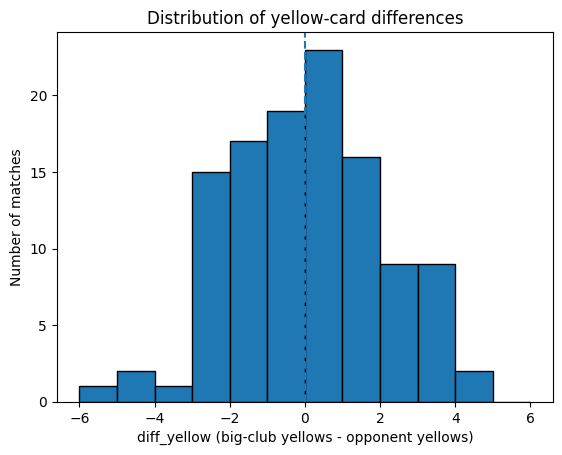

In [ ]:
import matplotlib.pyplot as plt

# Histogram of yellow-card differences (big club - opponent)
plt.figure()
plt.hist(all_big["diff_yellow"], bins=range(-6, 7), edgecolor="black")
plt.axvline(0, linestyle="--")
plt.xlabel("diff_yellow (big-club yellows - opponent yellows)")
plt.ylabel("Number of matches")
plt.title("Distribution of yellow-card differences")
plt.show()

Most values are around -2 to +2, with the distribution slightly shifted to the left of zero

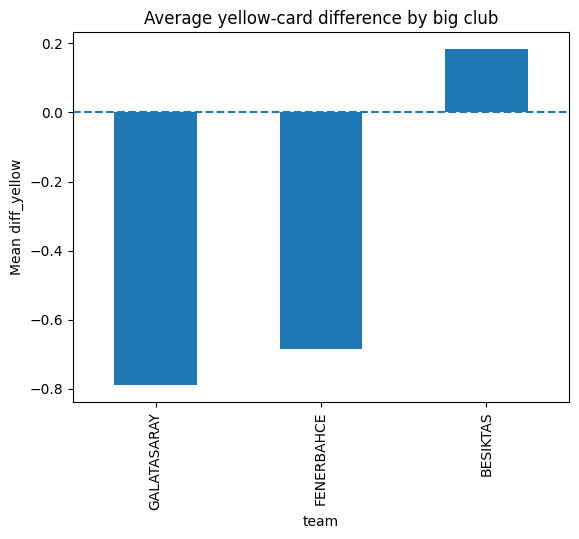

,diff_yellow
team,
GALATASARAY,-0.789474
FENERBAHCE,-0.684211
BESIKTAS,0.184211


In [ ]:
# Average yellow-card difference per big club
per_team_diff = (
    all_big.groupby("team")["diff_yellow"]
    .mean()
    .sort_values()
)

plt.figure()
per_team_diff.plot(kind="bar")
plt.axhline(0, linestyle="--")
plt.ylabel("Mean diff_yellow")
plt.title("Average yellow-card difference by big club")
plt.show()

per_team_diff

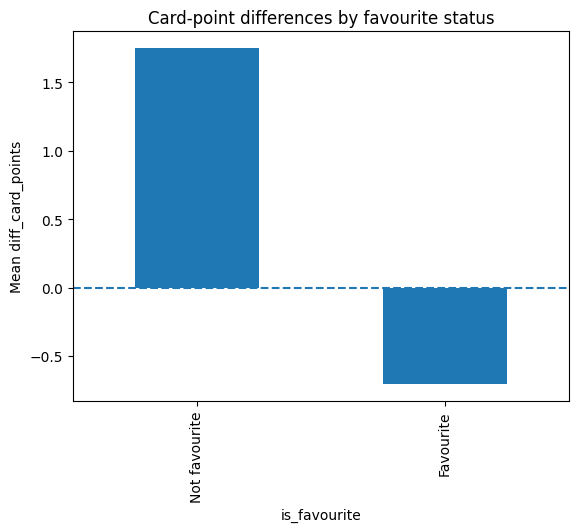

,diff_card_points
is_favourite,
Not favourite,1.750000
Favourite,-0.705882


In [ ]:
# Card-point differences by favourite status
fav_diff = (
    all_big.groupby("is_favourite")["diff_card_points"]
    .mean()
    .rename(index={True: "Favourite", False: "Not favourite"})
)

plt.figure()
fav_diff.plot(kind="bar")
plt.axhline(0, linestyle="--")
plt.ylabel("Mean diff_card_points")
plt.title("Card-point differences by favourite status")
plt.show()

fav_diff

The plot shows that when big clubs are pre-match favourites, their mean card-point difference is negative (they receive fewer total card points than their opponents). When they are not favourites, the mean difference becomes positive, indicating that they receive more card points.

## ML – Predicting which side gets more card points (RQ1)

In [37]:
# Ensure card points exist (defensive)
all_big["team_card_points"] = all_big["team_yellow"] + 2 * all_big["team_red"]
all_big["opp_card_points"]  = all_big["opp_yellow"]  + 2 * all_big["opp_red"]

# Copy for modeling
model_df = all_big.copy()

# Drop ties: same card points for both sides
model_df = model_df[model_df["team_card_points"] != model_df["opp_card_points"]].copy()

# Target: 1 if big club gets more card points, 0 otherwise
model_df["y_big_more_cards"] = (
    model_df["team_card_points"] > model_df["opp_card_points"]
).astype(int)

model_df = model_df[[
    "team",
    "home_away",
    "big_win_prob",
    "opp_win_prob",
    "is_favourite",
    "week",
    "y_big_more_cards",
]]

model_df.head()

,team,home_away,big_win_prob,opp_win_prob,is_favourite,week,y_big_more_cards
0,BESIKTAS,A,0.593737,0.175365,True,1,0
2,BESIKTAS,H,0.686563,0.128003,True,3,0
3,BESIKTAS,A,0.426883,0.307167,True,4,0
4,BESIKTAS,H,0.691158,0.124533,True,5,1
5,BESIKTAS,A,0.450945,0.300630,True,6,0


In [38]:
model_df["y_big_more_cards"].value_counts(), model_df["y_big_more_cards"].value_counts(normalize=True)

(y_big_more_cards
 0    55
 1    36
 Name: count, dtype: int64,
 y_big_more_cards
 0    0.604396
 1    0.395604
 Name: proportion, dtype: float64)

In [39]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = model_df.drop(columns=["y_big_more_cards"])
y = model_df["y_big_more_cards"]

# One-hot encode categorical variables
X_encoded = pd.get_dummies(
    X,
    columns=["team", "home_away", "is_favourite"],
    drop_first=True  # avoid dummy variable trap
)

X_encoded.head(), X_encoded.shape

(   big_win_prob  opp_win_prob  week  team_FENERBAHCE  team_GALATASARAY  home_away_H  is_favourite_True
 0      0.593737      0.175365     1            False             False        False               True
 2      0.686563      0.128003     3            False             False         True               True
 3      0.426883      0.307167     4            False             False        False               True
 4      0.691158      0.124533     5            False             False         True               True
 5      0.450945      0.300630     6            False             False        False               True,
 (91, 7))

In [40]:
# Train-test split (keep class balance with stratify)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape, y_train.value_counts(normalize=True)

((68, 7),
 (23, 7),
 y_big_more_cards
 0    0.602941
 1    0.397059
 Name: proportion, dtype: float64)

In [41]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix

# Baseline: always predict the majority class from the training set
majority_class = y_train.value_counts().idxmax()
print("Majority class in training data:", majority_class)

# Create a prediction vector where every test sample is predicted as the majority class
y_baseline_pred = np.full_like(y_test, fill_value=majority_class)

baseline_acc = accuracy_score(y_test, y_baseline_pred)
print("Baseline accuracy (majority class):", round(baseline_acc, 3))

print("\nBaseline confusion matrix (rows = true, cols = predicted):")
print(confusion_matrix(y_test, y_baseline_pred))

Majority class in training data: 0
Baseline accuracy (majority class): 0.609

Baseline confusion matrix (rows = true, cols = predicted):
[[14  0]
 [ 9  0]]


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Logistic regression model
log_reg = LogisticRegression(max_iter=1000)

# Fit on training data
log_reg.fit(X_train, y_train)

# Predict on test data
y_pred = log_reg.predict(X_test)

# Accuracy
log_acc = accuracy_score(y_test, y_pred)
print("Logistic regression accuracy:", round(log_acc, 3))

# Detailed metrics
print("\nClassification report:")
print(classification_report(y_test, y_pred))

print("Confusion matrix (rows = true, cols = predicted):")
print(confusion_matrix(y_test, y_pred))

Logistic regression accuracy: 0.783

Classification report:
              precision    recall  f1-score   support

           0       0.76      0.93      0.84        14
           1       0.83      0.56      0.67         9

    accuracy                           0.78        23
   macro avg       0.80      0.74      0.75        23
weighted avg       0.79      0.78      0.77        23

Confusion matrix (rows = true, cols = predicted):
[[13  1]
 [ 4  5]]


In [43]:
# Check feature coefficients to understand which variables push the model
coef_df = pd.DataFrame({
    "feature": X_train.columns,
    "coef": log_reg.coef_[0]
}).sort_values("coef", ascending=False)

coef_df

,feature,coef
1,opp_win_prob,0.244554
2,week,-0.009636
5,home_away_H,-0.044829
3,team_FENERBAHCE,-0.118464
0,big_win_prob,-0.281295
4,team_GALATASARAY,-0.473545
6,is_favourite_True,-1.332596
